### <div align="center">Supervised Machine Learning - Classification</div>

##### 4.1: Introduction to Classification
- Regression Models work with continuous values that can take on any value, while Classification is categorical and sticks to a definite set of values.
- The Classification Model can be split into two types:
  1. Binary Classification
  2. Multi class Classification

##### 4.2: Logistic Regression: Binary Classification
- The Sigmoid Function converts input a range from 0 to 1.
- sigmoid(z)=1/(1+e^−z) , e = Euler’s number - 2.71828
- It is a crucial function in logistic regression for binary classification as it maps linear outputs to probabilities, helping to improve the model’s predictions.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


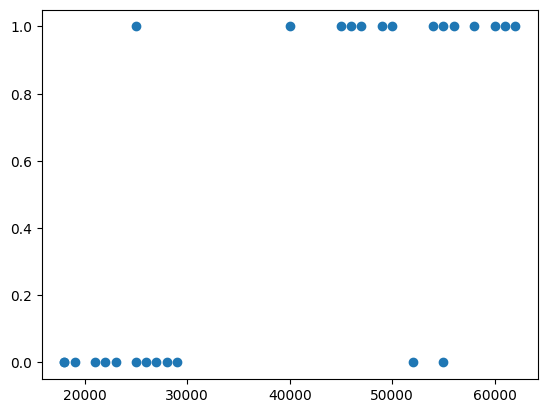

In [6]:
plt.scatter(df.monthly_salary, df.owns_car)
plt.show()

In [17]:
# Separate the features and the target variable
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
y_test.tolist()

[1, 0, 1, 0, 0, 0, 1, 1, 0]

In [11]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000


In [12]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [13]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [14]:
model.coef_, model.intercept_

(array([[0.00013621]]), array([-5.39725076]))

In [15]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(salary, model):
    z = model.coef_ * salary + model.intercept_
    y = sigmoid(z[0][0])
    return y

prediction_function(62000, model)

0.954690678813166

In [16]:
prediction_function(29000, model)

0.1904465115158154

##### 4.3: Model Evaluation - Accuracy, Precision and Recall
- We have two category for classification
  - Truth (Actual Value)
  - Prediction (Predicted Value)
- `Accuracy` is the proportion of true results (both true positives and true negatives) among the total number of cases examined.
  - Accuracy = (True Positives + True Negatives) / (Total Cases)
  - While accuracy can be a useful metric, it might not always provide a comprehensive view of a model's performance. Therefore, we also consider other measures like precision and recall to ensure a more rounded evaluation.
  - `In simple term`: Accuracy is the overall correctness of a model. It tells you the proportion of total predictions that were right. For example, if a model predicts whether emails are spam or not, accuracy is the percentage of all emails (spam and not spam) that the model classified correctly.
- `Precision` is the ratio of true positive predictions to the total predicted positives, measuring the accuracy of the positive predictions.
  - Precision = (True Positives) / (True Positives + False Positive)
  - Out of all dog predictions how many are correct (Basically we reference prediction as base).
  - `In simple term`: Precision is about correctness when the model predicts positive. It measures how many of the items predicted as positive are actually positive. For example, if the model says 10 emails are spam and 8 really are, precision is 8/10 = 80%. Precision cares about avoiding false alarms (false positives).
- `Recall` is the ratio of true positive predictions to the actual positives, assessing the model’s ability to identify all relevant cases.
  - Recall = (True Positives) / (True Positive + False Negative)
  - Out of all dogs in the truth, how many did we predict correctly (Basically we reference truth as base).
  - `In simple term`: Recall (also called sensitivity) tells how well the model detects all the actual positive cases. It measures how many of the real positives the model successfully finds. For example, if there are 10 spam emails and the model correctly detects 9, recall is 9/10 = 90%. Recall cares about not missing positives.

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



##### 4.6: Model Evaluation - F1 Score, Confusion Matrix
- The F1 score is the harmonic mean of the precision and recall.
- F1 Score = 2 × (Precision×Recall / Precision + Recall)
- When we need balance between precision and recall then we use F1 score.
- A confusion matrix is a table layout that visualizes the performance of a classification algorithm by displaying the true and false predictions it makes.

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

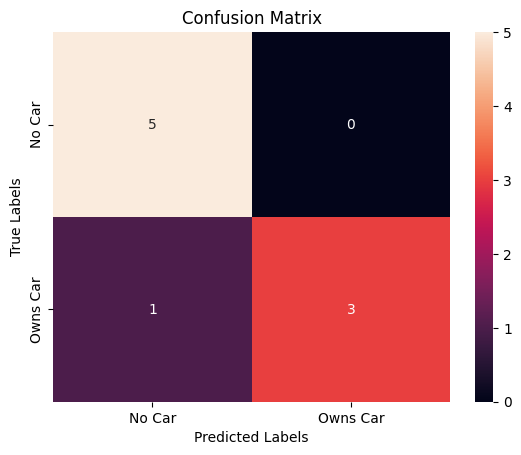

In [21]:
import seaborn as sns

classes = ["No Car", "Owns Car"]

sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Diagonal is true prediction it means when we have predicted 5 no car and 3 owns car and actually it is right.

#### 4.7: Logistic Regression: Multiclass Classification
- Problem Statement: Classify an IRIS flower into one of the three categories ['setosa', 'versicolor', 'virginica'] based on their petal and sepal width and height. We will use logistic regression for this classification problem

<img width=100 height=100 src="../../screenshots/iris.png"/>

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [26]:
# Load Data
iris = load_iris(as_frame=True)
iris.keys()
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
iris.target_names
# print(iris.DESCR)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
# Data Visualization
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


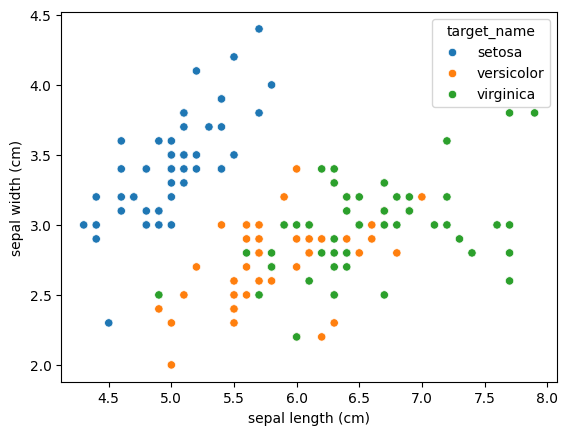

In [31]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")
plt.show()

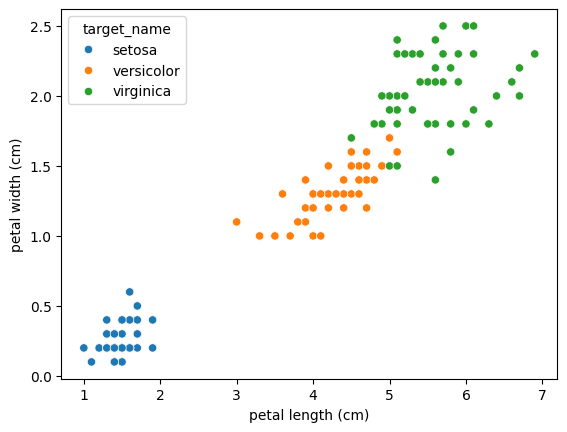

In [32]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")
plt.show()

In [33]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Train logistic regression model 
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [37]:
model.score(X_test, y_test)

0.9777777777777777

In [38]:
# Model Evaluation: Precision, Recall, F1-Score
y_pred = model.predict(X_test)
y_pred[:10]

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



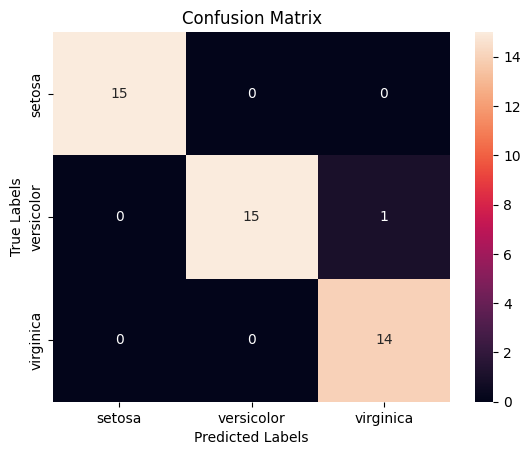

In [40]:
# Model Evalution: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 4.8: Cost Function: Log Loss
- The Cost Function (MSE) will work for Linear Regressions as it is a convex function, but it won't work for Logistic Regression as it is a non-convex function.
- Log Loss: − 1/N i=1,n ∑[yi * log(pi) + (1−yi) * log(1−pi​)]
  - yi = Actual value for the i-th record
  - pi = Predicted probability for the i-th record
  - N = Number of Records
- Log Loss is the underlying Cost Function that we use in Logistic Regression.
- Log Loss is also known as: Logistic Loss, Binary Cross Entropy, Multinomial Log Loss

##### 4.11: Support Vector Machine (SVM)
- Support Vector Machine (SVM) is a robust supervised learning model that finds the optimal hyperplane in an n-dimensional space for classification and regression tasks.
- A Kernel is a function that transforms data into a higher dimensional space so that a decision boundary can be drawn. There are different kernels available for different use cases, some examples - poly, linear, rbf, sigmoid.
- Gamma (γ): This is a parameter in SVM that decides the impact of each data point on the decision boundary. It is about how closely the model adheres to the data.
- Regularization: In machine learning, regularization adds a complexity penalty to the model to curb over fitting and enhance its performance on new data.
- Choosing the appropriate kernel significantly influences the total computational power. This, in turn, affects the budget of the entire project.

### Problem Statement:  Classify raisins into one of the two categories,
1. Kecimen
1. Besni

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: Cinar, I., Koklu, M., & Tasdemir, S. (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. *Gazi Journal of Engineering Sciences, 6*(3), 200-209. DOI: [10.30855/gmbd.2020.03.03](https://doi.org/10.30855/gmbd.2020.03.03)
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)
- **Article download**: [DergiPark](https://dergipark.org.tr/tr/download/article-file/1227592)

In [42]:
import pandas as pd

df = pd.read_excel("../../data/Raisin_Dataset.xlsx")
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
594,133784,581.286948,300.635686,0.855871,139806,0.679590,1502.661,Besni
491,77105,419.953696,238.839466,0.822526,80497,0.668995,1131.540,Besni
430,57838,350.285459,214.802450,0.789911,59449,0.674040,939.149,Kecimen
445,61200,323.174410,246.288324,0.647470,64553,0.707449,997.264,Kecimen
248,62064,352.368670,227.864144,0.762775,64811,0.650566,1004.245,Kecimen


In [44]:
X = df[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]]
y = df["Class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [45]:
# Model Training Using SVM: Linear Kernel

from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.88      0.90        83
     Kecimen       0.90      0.93      0.91        97

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



array([85005907], dtype=int32)

##### 4.12: Data Pre-processing: Scaling
- Scaling in machine learning involves adjusting the range of feature values to a common scale, such as 0 to 1, enhancing model performance by ensuring each feature contributes equally.
  - Min-Max Scaling
  - Standard Scaling (Z-score normalization)

In [46]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Model Training Using SVM: RBF Kernel: No Scaling
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.86      0.75      0.80        83
     Kecimen       0.81      0.90      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



array([229], dtype=int32)

In [48]:
# Model Training Using SVM: RBF Kernel: With Scaling
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([382], dtype=int32)

##### 4.13: Sklearn Pipeline
- Sklearn offers a handy and robust tool known as a pipeline. This feature lets you build and operate a series of data transformation and modeling tasks as one entity.
- This tool is instrumental in simplifying machine learning workflows, safeguarding uniformity in data processing, and enhancing the efficacy of model creation and evaluation.

In [49]:
# Use Sklearn Pipeline To Perform Scaling and Training in a Single Step
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [50]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([382], dtype=int32)

##### 4.17: Naive Bayes Classification Theory
- P(A | B) = Probability of event A knowing that event B has already occurred.Conditional probability: When one event is occured what is the probability of other event.
- Bayes’ Theorem: P(A | B) = P(B | A) * P(A) / P(B)
- It's called Naive Bayes because it makes the naive assumption that all features (such as p(free) or p(lottery)) are independent of each other.
##### 4.18: Naive Bayes: SMS Spam Classification
- Machine learning models process numbers, not text. Hence, during preprocessing, it is crucial to convert text-based datasets into numerical form for model training.
- The Count Vectorizer transforms a collection of text documents into a matrix of token counts. It essentially reflects the frequency of each word within the documents. Sklearn offers a built-in API for this operation.
- For the Naive Bayes implementation, we opted for MultinomialNB. It is apt for situations where features are word frequencies in a text, making it a popular choice for text classification.

In [51]:
import pandas as pd

df = pd.read_csv("../../data/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message,df.Category, test_size=0.2, random_state=5)

In [54]:
# Feature Engineering: Convert Text into Vector
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
# Train a Model Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [56]:
# Model Evaluation: Precision, Recall and F1-Score
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



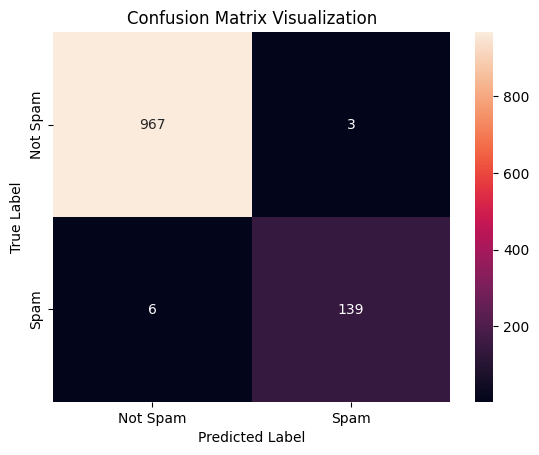

In [57]:
# Model Evaluation: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [58]:
# Prediction on Sample Emails
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [59]:
# Now do same thing using Sklearn Pipeline with Few Lines of Code
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [60]:
pipe.predict(emails)

array(['ham', 'spam'], dtype='<U4')

##### 4.21: Decision Tree Theory
- In machine learning, a decision tree is a type of supervised learning algorithm. It models decisions and their potential outcomes in a structure resembling a tree, composed of various choices.
- You can select the higher-level nodes using either of the following typical methods.
  - Gini Impurity (Check formula)
  - Entropy (Information Gain)

In [61]:
import pandas as pd

df = pd.read_csv("../../data/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [62]:
# Feature Engineering: Encode Text Columns Using Label and One Hot Encoding
df.degree.unique()

array(['bachelors', 'masters'], dtype=object)

In [63]:
df['degree_number'] = df.degree.map({'bachelors':1, 'masters': 2})
df.head(3)

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1


In [64]:
df.drop('degree', axis="columns", inplace=True)
df.head(3)

,company,job,salary_more_then_100k,degree_number
0,google,sales executive,0,1
1,google,sales executive,0,2
2,google,business manager,1,1


In [65]:
df_encoded = pd.get_dummies(df, columns=['company', 'job'], drop_first=True)
df_encoded.head()

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,False,True,False,True
1,0,2,False,True,False,True
2,1,1,False,True,False,False
3,1,2,False,True,False,False
4,0,1,False,True,True,False


#### Train a classifier using a default criterian which is "gini"
- We will not do train, test split because our data size is very small (16 records only). The purpose of this tutorial is to explain you DecisionTreeClassifier and also to print the decision tree (for which small dataset with less features is useful). In real life, you will almost always to train, test split.

In [66]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('salary_more_then_100k', axis="columns")
y = df_encoded['salary_more_then_100k']

model = DecisionTreeClassifier(criterion="gini")
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [67]:
# Optionally, visualize the tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |--- company_google <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- company_google >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



In [68]:
# Train a classifier using entropy criterion (i.e. information gain) rather than gini impurity
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [69]:
# Optionally, visualize the tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



In [70]:
X.head(2)

,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,1,False,True,False,True
1,2,False,True,False,True


In [71]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
model.predict([[1, 0, 1, 1, 0]])

C:\Users\sweanand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [72]:
# Is salary of Google, Computer Engineer, Masters degree > 100 k ?
model.predict([[2, 0, 1, 1, 0]])

C:\Users\sweanand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

#### 4.26: Handle Class Imbalance
- Class imbalance in machine learning occurs when the number of samples in each class is not equal, leading to a skewed distribution. There are several techniques to handle class imbalance in machine learning:
  - Under Sampling Majority Class: Reduce instances in the majority class.
  - Over Sampling minority class by duplication: Create more minority class instances by duplicating them.
  - Over sampling minority class using SMOTE
    - Generate synthetic examples using k nearest neighbors algorithm
    - SMOTE – Synthetic Minority Over-sampling Technique
  - Over sampling – SMOTE Tomek Links: Remove bridges (Tomek links) between neighboring minority and majority class instances
  - Ensemble Method: Combine models to balance class imbalance.

In [73]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [74]:
df = pd.read_csv("../../data/churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [75]:
df.Churn.value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

There is a class imbalance. Only 495 customers with Churn value 1 versus 2655 with Churn value 0

In [76]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [91]:
# Without handling class imbalance
X = df.drop('Churn', axis=1)  
y = df['Churn']  

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.78      0.40      0.53        99

    accuracy                           0.89       630
   macro avg       0.84      0.69      0.74       630
weighted avg       0.88      0.89      0.87       630



#### Method 1: Undersampling

In [79]:
print(y_train.value_counts())

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

Churn
0    2124
1     396
Name: count, dtype: int64


Churn
0    396
1    396
Name: count, dtype: int64

In [89]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_rus, y_train_rus)

y_pred_rus = model.predict(X_test)
report = classification_report(y_test, y_pred_rus)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       531
           1       0.46      0.85      0.60        99

    accuracy                           0.82       630
   macro avg       0.71      0.83      0.74       630
weighted avg       0.89      0.82      0.84       630



#### Method 2: SMOTE (Oversampling)

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

In [84]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.89      0.81      0.83       630



#### Method 3: SMOTE Tomek Links (Oversampling)

In [92]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)
y_tomek.value_counts()

Churn
0    2091
1    2091
Name: count, dtype: int64

In [94]:
model = LogisticRegression(max_iter=5000)
model.fit(X_tomek, y_tomek)

y_pred_tomek = model.predict(X_test)
report = classification_report(y_test, y_pred_tomek)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.89      0.81      0.83       630



### Breast cancer recurrence prediction use case

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [3]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [4]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("../data/breast_cancer_data.csv")
print("Number of rows and columns: ", df.shape)
print("First few rows of the dataset:")
df.head()

Number of rows and columns:  (286, 10)
First few rows of the dataset:


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [5]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64


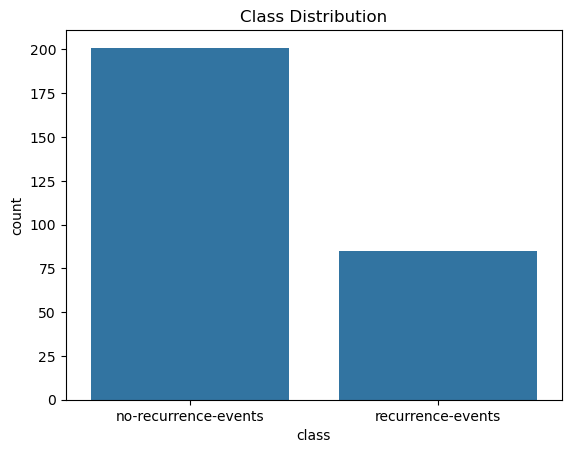

In [6]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [7]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.
df = pd.get_dummies(df, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
print("First few rows of the encoded dataset:")
df.head()

First few rows of the encoded dataset:


,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


### Logistic Regression Model Without Handling Class Imbalance
1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [19]:
# Step 1: Split the dataset into training and test sets
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report Without Handling Class Imbalance:")
print(report)

Classification Report Without Handling Class Imbalance:
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        41
   recurrence-events       0.50      0.29      0.37        17

            accuracy                           0.71        58
           macro avg       0.62      0.59      0.59        58
        weighted avg       0.68      0.71      0.68        58



### Handling Class Imbalance Using Undersampling
1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [18]:
# Step 1: Apply undersampling to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the undersampled training data
model_rus = LogisticRegression(max_iter=2000)
model_rus.fit(X_train_rus, y_train_rus)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_rus = model_rus.predict(X_test)
report_rus = classification_report(y_test, y_pred_rus)
print("Classification Report with Undersampling:")
print(report_rus)

Classification Report with Undersampling:
                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.54      0.65        41
   recurrence-events       0.39      0.71      0.50        17

            accuracy                           0.59        58
           macro avg       0.60      0.62      0.57        58
        weighted avg       0.69      0.59      0.60        58



### Handling Class Imbalance Using SMOTE (Oversampling)
1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [16]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model_smote = LogisticRegression(max_iter=200)
model_smote.fit(X_train_smote, y_train_smote)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_smote = model_smote.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote)
print("Classification Report with SMOTE:")
print(report_smote)

Classification Report with SMOTE:
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58



### Handling Class Imbalance Using SMOTE Tomek Links
1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [17]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
smt = SMOTETomek(random_state=42)
X_tomek, y_tomek = smt.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model_tomek = LogisticRegression(max_iter=2000)
model_tomek.fit(X_tomek, y_tomek)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_tomek = model_tomek.predict(X_test)
report_tomek = classification_report(y_test, y_pred_tomek)
print("Classification Report with SMOTE Tomek Links:")
print(report_tomek)

Classification Report with SMOTE Tomek Links:
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.66      0.72        41
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.64        58
           macro avg       0.61      0.62      0.60        58
        weighted avg       0.68      0.64      0.65        58

